# Clean data to prepare for NLP

##### Import libraries

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##### Load data

In [2]:
# PreCovid Reddit posts
PreCovid_posts = pd.read_csv('../data/raw/reddit_posts_PreCovid.csv') 

# PostCovid Reddit posts
PostCovid_posts = pd.read_csv('../data/raw/reddit_posts_PostCovid.csv') 

# Clean data

In [3]:
PreCovid_posts.head()

,author,title,selftext,created_utc,subreddit
0,sub16784,Help. Dying inside,So I posted something similar on the binge eat...,1526608139,bulimia
1,sub12545,Book Recommendations? - Brain Over Binge,"Hi, a few months ago I went to an Eating Disor...",1526595326,bulimia
2,sub10227,In need of some encouragement,"I just binged on pizza rolls, doritos and cand...",1526528018,bulimia
3,sub10942,Struggling so badly. I can't take this feeling,I had a surgery that doesn't allow me to purg...,1526519003,bulimia
4,sub4221,Been trying to quit this nasty habit...,Struggling with bulimia for 4 years now and it...,1526360915,bulimia


In [4]:
# Double check - Did I get the comments but not the posts themsleves?
PostCovid_posts.head()

,author,title,selftext,created_utc,subreddit
0,sub17706,if i was able to keep an excess of food in my ...,NaN,1593568164,bulimia
1,sub19142,Get help. Please.,I know it’s embarrassing. I know it is hard to...,1593566253,bulimia
2,sub15645,More bulimemes for you guys 👌🏻,NaN,1593556888,bulimia
3,sub10794,Teeth Are Rough?,[Here are my teeth](https://imgur.com/a/pyV5Ss...,1593555043,bulimia
4,sub17937,Badanie,[removed],1593534095,bulimia


In [5]:
PreCovid_posts.dtypes

author         object
title          object
selftext       object
created_utc     int64
subreddit      object
dtype: object

In [6]:
PostCovid_posts.dtypes

author         object
title          object
selftext       object
created_utc     int64
subreddit      object
dtype: object

In [7]:
len(PreCovid_posts) - len(PostCovid_posts)

2079

#### Check Null Values

In [8]:
PreCovid_posts.isnull().sum()

author            0
title             0
selftext       4002
created_utc       0
subreddit         0
dtype: int64

In [9]:
PostCovid_posts.isnull().sum()

author            0
title             0
selftext       2910
created_utc       0
subreddit         0
dtype: int64

## Combine columns

In [10]:
# Combine title with self text column and then check NAs again
PreCovid_posts['text'] = PreCovid_posts[['title', 'selftext']].stack().groupby(level=0).agg(' : '.join)


In [11]:
PostCovid_posts['text'] = PostCovid_posts[['title', 'selftext']].stack().groupby(level=0).agg(' : '.join)


In [17]:
# Drop the columns we combined
PreCovid_posts.drop(columns = ['title','selftext'], inplace=True)

In [18]:
PostCovid_posts.drop(columns = ['title','selftext'], inplace=True)

## Explore the dataframes

In [23]:
# Submissionlength
# Create a new column with submission length
PreCovid_posts['text_length'] = PreCovid_posts['text'].map(len)
PostCovid_posts['text_length'] = PostCovid_posts['text'].map(len)

In [24]:
# Create a new column with number of words per submission
PreCovid_posts['text_word_count'] = PreCovid_posts['text'].map(lambda x: len(x.split()))
PostCovid_posts['text_word_count'] = PostCovid_posts['text'].map(lambda x: len(x.split()))

In [26]:
# Show the shortest submissions 
PreCovid_posts.sort_values(by='text_word_count', ascending=True)[['text']].head()

,text
10316,“teleport”
9191,Retards
5512,I.ate.breakfast.
5513,..
18855,absolutelynotmeirl


In [27]:
PostCovid_posts.sort_values(by='text_word_count', ascending=True)[['text']].head()

,text
7456,Lol
12247,*sigh*
12246,Yup
7610,Brest
12216,w


In [28]:
# Show the longest submissions
PreCovid_posts.sort_values(by='text_word_count', ascending=False)[['text']].head()

,text
11470,My journey into the rabbit hole - investigatio...
27396,"Abusive, possibly narcissistic mother trying t..."
13072,Schizophrenic-Writing to a lost love : The Fau...
14189,"Met a girl with BDP, This is my Story (Long te..."
11692,"Can I have your opinion on my situation? : Hi,..."


In [29]:
# Show the longest submissions
PostCovid_posts.sort_values(by='text_word_count', ascending=False)[['text']].head()

,text
27026,Life of a Transgender in Russia : I need help....
28384,My Story - TW⚠️ : I have never actually posted...
28385,My Story - TW⚠️ : I have never actually posted...
4298,A rather fast recovery : &amp;#x200B;\n\nI wil...
15116,"She left me feeling blame, shame, and remorse...."


In [39]:
# Check if 28384 and 28385 are duplicates... 
# it's not the same author so also need to double check this, is the anonymizing wrong 
# or does it apear as a different author in raw file?
PostCovid_posts.iloc[[28384]]

,author,created_utc,subreddit,text,text_length,text_word_count
28384,sub18411,1591323269,mentalhealth,My Story - TW⚠️ : I have never actually posted anything on reddit and I am pretty anxious about ...,25307,4981


In [40]:
PostCovid_posts.iloc[[28385]]

,author,created_utc,subreddit,text,text_length,text_word_count
28385,sub10431,1591323024,mentalhealth,My Story - TW⚠️ : I have never actually posted anything on reddit and I am pretty anxious about ...,25307,4981


In [50]:
# Write function to check for duplicates

# Selecting duplicate rows except last  
# occurrence based on all columns. 
duplicate = PostCovid_posts[PostCovid_posts['text'].duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,author,created_utc,subreddit,text,text_length,text_word_count
111,sub980,1602326411,bulimia,r/bulimia Casual Check-in : How was your week? What are you up to on the weekend? Feel free to s...,387,69
292,sub980,1599302416,bulimia,r/bulimia Casual Check-in : How was your week? What are you up to on the weekend? Feel free to s...,387,69
343,sub9236,1599074752,bulimia,Helpful apps? : Do any of you guys know of apps specifically for bulimia recovery? Or even binge...,355,65
747,sub980,1604745613,bulimia,r/bulimia Casual Check-in : How was your week? What are you up to on the weekend? Feel free to s...,387,69
785,sub980,1597488012,bulimia,r/bulimia Casual Check-in : How was your week? What are you up to on the weekend? Feel free to s...,387,69
...,...,...,...,...,...,...
27746,sub10776,1588380387,mentalhealth,Can I Kin a character who has DID if I have DPDR? (Diagnosed) : If any of you don’t know what ki...,235,45
27747,sub10776,1588380364,mentalhealth,Can I Kin a character who has DID if I have DPDR? (Diagnosed) : If any of you don’t know what ki...,235,45
27749,sub12509,1588379844,mentalhealth,Can someone diagnose me : I was mentally and physically abused when I was younger I always thoug...,1063,201
28320,sub11734,1591347788,mentalhealth,It's so hard for me to cry or even shed a tear no matter if I'm alone or with somebody else : I...,1440,289


In [53]:
# Write function to check for duplicates

# Selecting duplicate rows except last  
# occurrence based on all columns. 
duplicate1 = PreCovid_posts[PreCovid_posts['text'].duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate1

Duplicate Rows :


,author,created_utc,subreddit,text,text_length,text_word_count
624,sub14570,1561927536,bulimia,i tried : I just binged ate a bunch of food like an idiot. I figured i’d just purge it up- that ...,273,61
1380,sub9644,1551389247,bulimia,"I haven’t purged in 17 days!!!!! : I’m so so so excited!!!! \n17 days ago, I had only made it 16...",425,88
1775,sub7986,1565493756,bulimia,How do I learn to unlove eating : I just love to eat. Period. No mindful eating is going to help...,680,124
3185,sub19674,1571311288,bulimia,Thought this belonged here,26,4
3287,sub17882,1572364911,bulimia,Topamax for BN? How to bring up to doctor? Pros and cons? : My BN is making me gain weight like ...,381,73
...,...,...,...,...,...,...
28778,sub14573,1544668751,mentalhealth,"MY RESEARCH for Experimental film based on mental illnesses : Hello everyone,\n\nI am final year...",895,159
29666,sub10310,1581022595,mentalhealth,Worry wart. : I have anxiety and I know this sounds like a common symptom but it really bothers ...,409,78
30016,sub3015,1519141132,mentalhealth,Hallucinations,14,1
30019,sub7177,1519136643,mentalhealth,I made a facebook post about mental health/illness,50,8


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


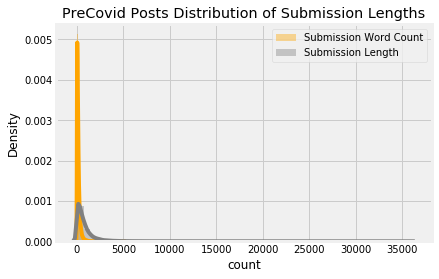

In [57]:
sns.distplot( PreCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot( PreCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PreCovid Posts Distribution of Submission Lengths")
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


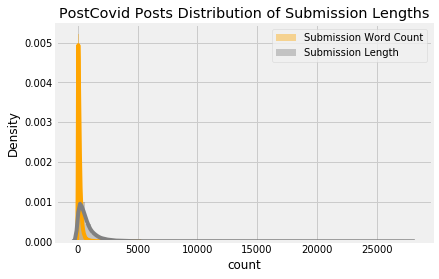

In [58]:
sns.distplot( PostCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot( PostCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PostCovid Posts Distribution of Submission Lengths")
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


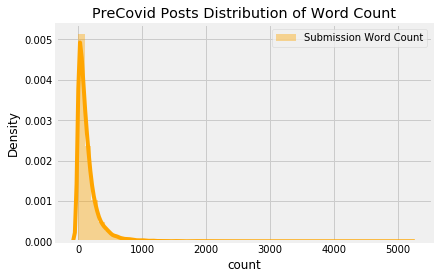

In [64]:
sns.distplot( PreCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
#sns.distplot( PreCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PreCovid Posts Distribution of Word Count")
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


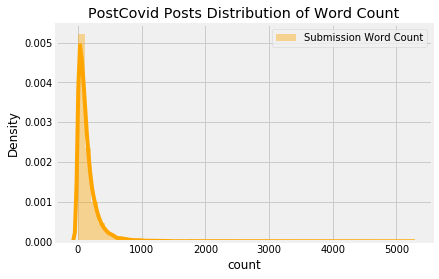

In [63]:
sns.distplot( PostCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
#sns.distplot( PostCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PostCovid Posts Distribution of Word Count")
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


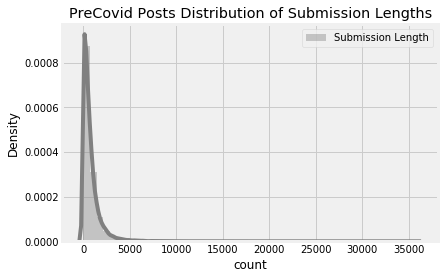

In [61]:
#sns.distplot( PreCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot( PreCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PreCovid Posts Distribution of Submission Lengths")
plt.legend();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


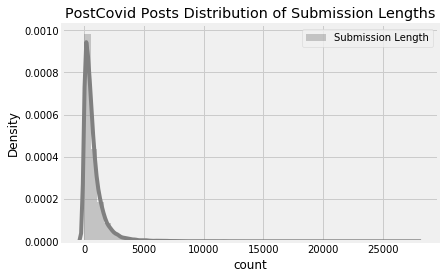

In [62]:
#sns.distplot( PostCovid_posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot(PostCovid_posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("PostCovid Posts Distribution of Submission Lengths")
plt.legend();

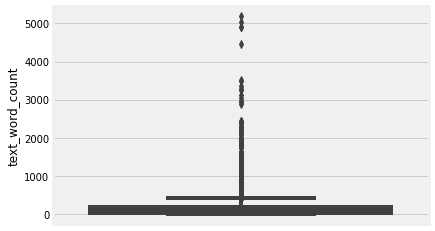

In [65]:
# Boxplot of word count distribution
sns.boxplot( y=PreCovid_posts['text_word_count']);

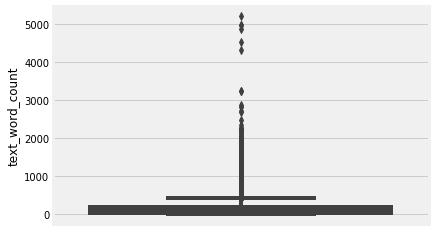

In [66]:
sns.boxplot( y=PostCovid_posts['text_word_count']);

#### Checkout outliers for each dataframe